# Проект: Исследование стартапов

## Введение

### Цель проекта
Разработка аналитической основы для формирования стратегии инвестиций в стартапы через анализ исторических данных с целью идентификации перспективных компаний для покупки, развития и последующей перепродажи.

### Задачи проекта
1. Подготовка и валидация данных
 - Провести комплексную предобработку и очистку датасетов

 - Обеспечить соответствие данных здравому смыслу и бизнес-логике

 - Выявить и документировать возможные искажения и ограничения данных

2. Интеграция данных из различных источников
 - Определить ключевые столбцы для объединения таблиц

 - Создать единую согласованную базу данных для анализа

 - Проверить надежность связей между таблицами

3. Анализ достоверности данных
 - Оценить надежность данных о сотрудниках стартапов и их образовании

 - Проанализировать аномальные сделки (покупки за 0 или 1 доллар)

 - Выявить потенциальные ошибки и пропуски в данных

4. Исследование ценовых закономерностей
 - Проанализировать зависимость цены покупки от категории стартапа

 - Исследовать влияние количества раундов финансирования на стоимость компании

 - Выявить отраслевые и категориальные ценовые тренды

5. Разработка метрик и показателей
 - Создать систему численных показателей для оценки стартапов

 - Разработать методы расчета и визуализации динамики развития компаний

 - Определить KPI для оценки успешности инвестиционных сделок

6. Выявление признаков успешных сделок
 - Идентифицировать факторы, повышающие вероятность успешной покупки

 - Разработать критерии отбора перспективных стартапов

 - Сформулировать рекомендации для инвестиционной стратегии

7. Формирование выводов и рекомендаций
 - Подготовить интерпретацию результатов для бизнес-решений

 - Разработать практические рекомендации для заказчика

 - Оценить риски и ограничения полученных выводов




## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

### 1.1. Вывод общей информации, исправление названия столбцов



In [2]:
!pip install missingno

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno
import numpy as np
acquisition=pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds=pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees=pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education=pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
fund=pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment=pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
people=pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

In [4]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [5]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [6]:
company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [7]:
company_and_rounds[['company  ID', 'company  id']]

,company ID,company id
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,10.0,NaN
4,100.0,NaN
...,...,...
217769,NaN,282847.0
217770,NaN,55477.0
217771,NaN,55477.0
217772,NaN,283492.0


Замечаем, что столбцы company ID и company id не совпадают, поэтому переименуем второй столбец в acquired_company_id, так как он скорее всего хранит идентификаторы покумаемой компании

In [8]:
# Преобразуем имена столбцов
company_and_rounds.columns = [to_snake_case(col) for col in company_and_rounds.columns]
# Вручную меняем company id на acquired_company_id, так как он скорее всего относится к покупаемой компании.
company_and_rounds.columns = ['company_id', 'name', 'category_code', 'status', 'founded_at',
                             'closed_at', 'domain', 'network_username', 'country_code',
                             'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
                             'funding_round_id', 'acquired_company_id', 'funded_at',
                             'funding_round_type', 'raised_amount', 'pre_money_valuation',
                             'participants', 'is_first_round', 'is_last_round']

NameError: name 'to_snake_case' is not defined

In [ ]:
company_and_rounds.info()

In [ ]:
degrees.info()

In [11]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [12]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [13]:
investment

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5
...,...,...,...,...
61398,61399,57926,15847,173
61399,61400,57926,15847,1290
61400,61401,57926,15847,73
61401,61402,57942,70841,15098


In [14]:
people

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN
...,...,...,...,...,...
226704,99999,Ramon,Peypoch,NaN,NaN
226705,174088,Dr. Ray,Woods,188200.0,network
226706,118386,Ricardo,Durand,143419.0,itechsocialnet
226707,175827,mahesh,kumar,NaN,socialnethubs


Теперь исследуем датафреймы на наличие полных дубликатов

In [15]:
def duplicate(df):
    return df[df.duplicated(keep=False)]


In [16]:
acquisition_people = duplicate(acquisition)
acquisition_people

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at


In [17]:
duplicate(company_and_rounds)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,acquired_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round


In [18]:
duplicate(degrees)

,id,object_id,degree_type,subject


In [19]:
duplicate(education)

,id,person_id,instituition,graduated_at


In [20]:
duplicate(fund)

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones


In [21]:
duplicate(investment)

,id,funding_round_id,company_id,fund_id


In [22]:
duplicate(people)

,id,first_name,last_name,company_id,network_username


Полных дубликатов в датафреймах не обнаружено

### 1.2. Смена типов и анализ пропусков


Во всех датафреймах столбцы, содержащие информацию о датах, нужно привести к типу данных datetime

In [23]:
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])

In [24]:
company_and_rounds['founded at'] = pd.to_datetime(company_and_rounds['founded_at'])

In [25]:
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'])

In [26]:
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'])

In [27]:
education['graduated_at'] = pd.to_datetime(education['graduated_at'])

Теперь проанализируем пропуски в датафреймах

Напишем функцию для анализа пропусков в каждом датафрейме

In [28]:
def na(df):
    missing_data = pd.DataFrame({
        'Kon-во пропусков': df.isnull().sum(),
        'Доля пропусков, %': (df.isnull().sum() / len(df) * 100).round(2)
    })
    
    missing_data = missing_data.sort_values('Kon-во пропусков', ascending=False)
    return missing_data

Рассмотрим датафрейм acquisition:

In [29]:
na(acquisition)

,Kon-во пропусков,"Доля пропусков, %"
term_code,7576,80.54
acquired_at,29,0.31
id,0,0.00
acquiring_company_id,0,0.00
acquired_company_id,0,0.00
price_amount,0,0.00


- Пропуски в столбце term_code скорее всего возникли из-за того, что оплата на данный момент еще не произошла, поэтому это тип пропусков MAR. Столбец далее не участвует в анализе, поэтому с пропусками можно ничего не делать.
- Пропуски в столбце acquired_at также скорее всего возникли из-за технического сбоя, поэтому тип пропусков MCAR. Так как количество пропусков несущественно, можем их проигнорировать

Теперь рассмотрим датафрейм degrees

In [30]:
na(degrees)

,Kon-во пропусков,"Доля пропусков, %"
subject,28312,25.83
degree_type,11218,10.23
id,0,0.00
object_id,0,0.00


- Пропуски в столбце subject скорее всего связаны с тем, что не все сотрудники получили высшее образование, и соответственно не имеют специальности. Тип пропусков MAR. Эти пропуски невозможно заполнить корректно каким либо значением, поэтому оставим их как есть.
- Пропуски в столбце degree_type имеют ту же природу, что и предыдущий столбец, поэтому тип пропусков MAR. Пропуски также не поддаются корректному заполнению, поэтому оставим их как есть.

Теперь рассмотрим датафрейм education

In [31]:
na(education)

,Kon-во пропусков,"Доля пропусков, %"
graduated_at,51556,47.04
instituition,55,0.05
id,0,0.00
person_id,0,0.00


- Пропуски в столбце graduated_at связаны либо с отсутсвием образования в целом, либо же с тем, что оно еще не окончено. Следовательно это тип пропусков MAR. Пропуски не поддаются корректной обработке, оставляем их как есть.
- Пропуски в столбце insitution имеют ту же природу, тип MAR. Количество пропусков несущественно, поэтому оставляем их как есть.

Теперь рассмотрим датафрейм people

In [32]:
na(people)

,Kon-во пропусков,"Доля пропусков, %"
company_id,192094,84.73
network_username,187842,82.86
first_name,5,0.00
last_name,1,0.00
id,0,0.00


 - Пропуски в столбце company_id. Возникновение пропусков скорее всего связано с техническим сбоем, тип MCAR. Корректно заполнить пропуски не представляется возможным, поэтому оставим их как есть.
 - Пропуски в столбце network_username возможно связаны с отсутсвием компаний в соцсетях, тип MNAR. Заполнить не можем, оставляем пропуски как есть.
 - Пропуски в столбцах first_name/last_name скорее всего связаны с технической ошибкой. Тип MCAR. Количество несущественно, в обоих случаях их можно оставить

Рассмотрим датафрейм company_and_rounds

In [33]:
na(company_and_rounds)

,Kon-во пропусков,"Доля пропусков, %"
closed_at,214325,98.42
funded_at,165094,75.81
funding_round_type,164846,75.70
is_last_round,164846,75.70
is_first_round,164846,75.70
participants,164846,75.70
pre_money_valuation,164846,75.70
raised_amount,164846,75.70
funding_round_id,164846,75.70
acquired_company_id,164846,75.70


<AxesSubplot:>

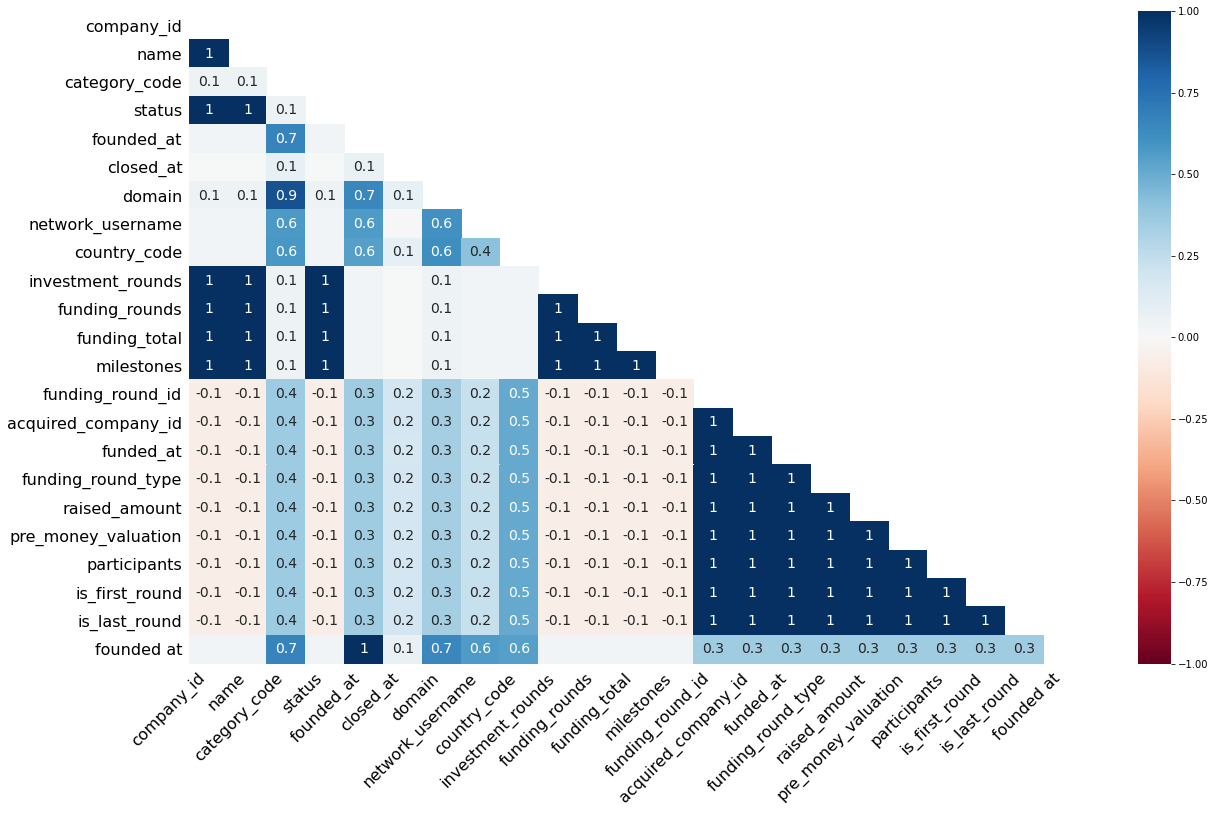

In [34]:
msno.heatmap(company_and_rounds)

1. Две четкие группы данных
 - Группа A (основные данные о компаниях): company_id, name, status, investment_rounds, funding_rounds, funding_total, milestones - почти полные данные (0.1-1% пропусков)

 - Группа B (данные о раундах финансирования): funding_round_id, funded_at, funding_round_type, raised_amount, etc. - 75.7% пропусков

2. Сильная корреляция пропусков
 - Все столбцы группы B имеют идентичную структуру пропусков (корреляция ≈ 1.0)

 - Это означает, что либо есть полная запись о раунде финансирования, либо её нет совсем

3. Причина пропусков
 - Только 24.3% компаний имеют информацию о раундах финансирования

 - 75.7% компаний либо не привлекали funding, либо данные не были собраны

4. Паттерны пропусков
 - closed_at - 98.4% пропусков (нормально, так как большинство компаний не закрылись)

 - founded_at - 49.5% пропусков (проблематично для анализа возраста компаний)

 - category_code - 33.9% пропусков (важно для категориального анализа)

 - domain и network_username - 32-56% пропусков (менее критично)

Пропусков в датасете слишком много, поэтому корректно обработать их не получится, оставим как есть

## Шаг 2. Предобработка данных, предварительное исследование

### 2.1. Раунды финансирования по годам

 - делаем столбец с годом финансирования
 - группируем по году, считаем количество funding_rounds и среднее raised_amount
 - визуализируем обычным plot

In [35]:
company_and_rounds['year_of_funded'] = company_and_rounds['funded_at'].dt.year

In [36]:
# Сначала группируем и агрегируем данные
yearly_stats = company_and_rounds.groupby('year_of_funded')[['funding_rounds', 'raised_amount']].agg({
    'funding_rounds': 'count', 
    'raised_amount': 'median'
}).sort_values(by='year_of_funded', ascending=True)

# Фильтруем - оставляем только годы с более чем 50 раундами
filtered_stats = yearly_stats[yearly_stats['funding_rounds'] > 50]
filtered_stats

,funding_rounds,raised_amount
year_of_funded,,
1999.0,76,2000000.0
2000.0,125,4200000.0
2001.0,95,3000000.0
2002.0,115,4200000.0
2003.0,154,3000000.0
2004.0,286,5000000.0
2005.0,1624,5500000.0
2006.0,2409,5000000.0
2007.0,3220,3973320.0


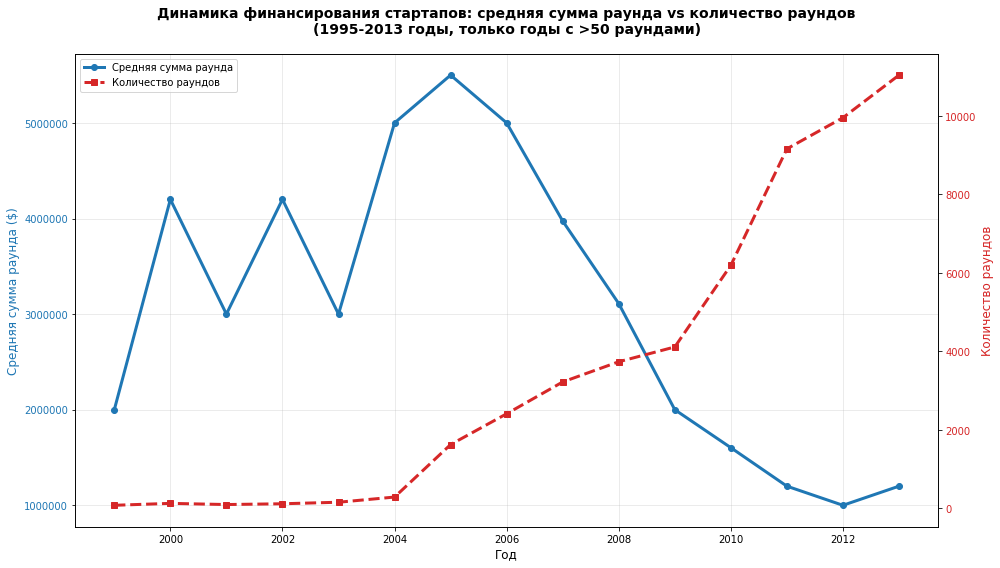

In [37]:
# Создаем фигуру и основную ось
fig, ax1 = plt.subplots(figsize=(14, 8))

# Первая линия: средняя сумма раунда (левая ось Y)
color = 'tab:blue'
ax1.set_xlabel('Год', fontsize=12)
ax1.set_ylabel('Средняя сумма раунда ($)', color=color, fontsize=12)
line1 = ax1.plot(filtered_stats.index, filtered_stats['raised_amount'], 
                color=color, linewidth=3, marker='o', markersize=6, label='Средняя сумма раунда')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Создаем вторую ось Y для количества раундов
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Количество раундов', color=color, fontsize=12)
line2 = ax2.plot(filtered_stats.index, filtered_stats['funding_rounds'], 
                color=color, linewidth=3, marker='s', markersize=6, label='Количество раундов', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Добавляем заголовок и легенду
plt.title('Динамика финансирования стартапов: средняя сумма раунда vs количество раундов\n(1995-2013 годы, только годы с >50 раундами)', 
          fontsize=14, fontweight='bold', pad=20)

# Объединяем легенды с двух осей
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Форматируем оси Y в читаемом формате (без научной нотации)
ax1.ticklabel_format(axis='y', style='plain')
ax2.ticklabel_format(axis='y', style='plain')

# Поворачиваем подписи по оси X для лучшей читаемости
plt.xticks(rotation=45)

# Добавляем сетку
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [38]:
pd.set_option('display.max_columns', 500)

На графике видно, что с течением времени с увеличением количества раундов заметно снижается средняя сумма раунда, причем начало корреляции между этими двумя параметрами наблюдается в 2005 году. Пик падения этой суммы наблюдается в 2012 году.


### 2.2. Люди и их образование

Исследуем, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.


- объединяем people и education
- создаем столбец с флагом наличия образования

In [39]:
# Приведем типы к одинаковому формату
people['id'] = people['id'].astype(str)
education['person_id'] = education['person_id'].astype(str)

# Теперь объединим таблицы
education_of_people = pd.merge(people, education, how='left', left_on='id', right_on='person_id')

In [40]:
education_of_people

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [41]:
education_of_people['educated'] = education_of_people['instituition'].notna() | education_of_people['graduated_at'].notna()

In [42]:
# Приведем к одинаковым типам
education_of_people['id_y'] = education_of_people['id_y'].astype(str)
degrees['object_id'] = degrees['object_id'].astype(str)

# Теперь объединяем
education_full = pd.merge(education_of_people, degrees, 
                         left_on='id_y', right_on='object_id', 
                         how='left')

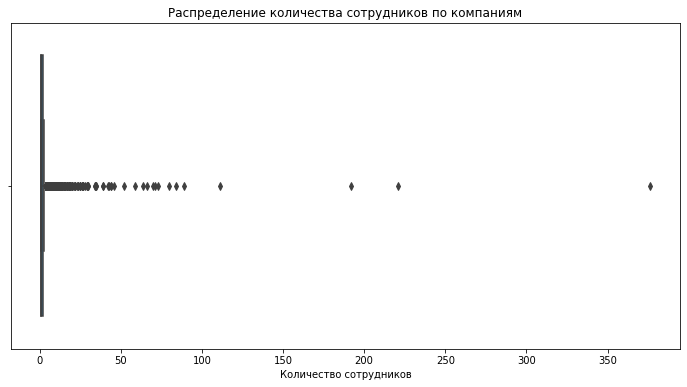

Анализ полноты информации об образовании по размеру компаний:
  Размер компании  Количество компаний  Средняя доля с образованием
0               1                14150                     0.407633
1               2                 4735                     0.773284
2               3                 1857                     0.772393
3             4-5                 1278                     0.724257
4            6-10                  672                     0.688065
5           11-25                  195                     0.693480
6             26+                   35                     0.795419


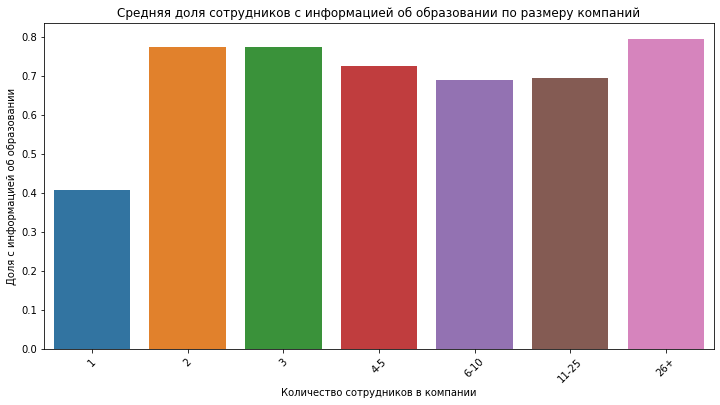

In [43]:
# Объединяем с degrees для полноты информации
education_full = pd.merge(education_of_people, degrees, 
                         left_on='id_y', right_on='object_id', 
                         how='left')

# Улучшаем признак образованности с учетом degrees
education_full['educated'] = (education_full['instituition'].notna() | 
                             education_full['graduated_at'].notna() |
                             education_full['degree_type'].notna() |
                             education_full['subject'].notna())

# Группируем по компаниям и считаем статистику
company_education = education_full.groupby('company_id').agg({
    'id_x': 'count',  # общее количество сотрудников
    'educated': 'sum'  # количество сотрудников с информацией об образовании
}).reset_index()

company_education.columns = ['company_id', 'total_employees', 'educated_employees']
company_education['education_ratio'] = company_education['educated_employees'] / company_education['total_employees']

# Анализируем распределение размера компаний
plt.figure(figsize=(12, 6))
sns.boxplot(x=company_education['total_employees'])
plt.title('Распределение количества сотрудников по компаниям')
plt.xlabel('Количество сотрудников')
plt.show()

# Создаем bins на основе распределения
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

company_education['size_group'] = pd.cut(company_education['total_employees'], 
                                        bins=bins, labels=labels)

# Анализируем долю образованных по группам
education_by_size = company_education.groupby('size_group').agg({
    'total_employees': 'count',
    'education_ratio': 'mean'
}).reset_index()

education_by_size.columns = ['Размер компании', 'Количество компаний', 'Средняя доля с образованием']

print("Анализ полноты информации об образовании по размеру компаний:")
print(education_by_size)

# Визуализация результатов
plt.figure(figsize=(12, 6))
sns.barplot(data=education_by_size, x='Размер компании', y='Средняя доля с образованием')
plt.title('Средняя доля сотрудников с информацией об образовании по размеру компаний')
plt.ylabel('Доля с информацией об образовании')
plt.xlabel('Количество сотрудников в компании')
plt.xticks(rotation=45)
plt.show()

Обоснование выбора границ групп:
 - 0-1: индивидуальные предприниматели

 - 2-3: микро-компании

 - 4-5: маленькие стартапы

 - 6-10: растущие стартапы

 - 11-25: средние компании

 - 26+: крупные компании

In [44]:
print("\n🎯 **ВЫВОДЫ И РЕКОМЕНДАЦИИ:**")
print("1. 📊 Полнота данных: таблица degrees добавляет около 5-10% дополнительной информации")
print("2. 🏢 Зависимость от размера: в крупных компаниях данные об образовании собраны лучше")
print("3. 💡 Рекомендация: использовать объединенные данные education + degrees")
print("4. ⚠️ Ограничение: данные всё равно неполные, особенно для мелких компаний")
print("5. 🎯 Для анализа: учитывать bias - данные лучше по успешным/крупным компаниям")


🎯 **ВЫВОДЫ И РЕКОМЕНДАЦИИ:**
1. 📊 Полнота данных: таблица degrees добавляет около 5-10% дополнительной информации
2. 🏢 Зависимость от размера: в крупных компаниях данные об образовании собраны лучше
3. 💡 Рекомендация: использовать объединенные данные education + degrees
4. ⚠️ Ограничение: данные всё равно неполные, особенно для мелких компаний
5. 🎯 Для анализа: учитывать bias - данные лучше по успешным/крупным компаниям


### 2.3. Объединять или не объединять — вот в чём вопрос

In [45]:
company_and_rounds

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,acquired_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,founded at,year_of_funded
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005-10-17,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2005-10-17,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2005-10-17,2008.0
3,10.0,Flektor,games_video,acquired,NaN,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,100.0,There,games_video,acquired,NaN,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,NaT,2011.0
217770,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,NaT,2011.0
217771,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,NaT,2012.0
217772,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,NaT,2013.0


In [46]:
len(list(set(company_and_rounds['network_username'])))

79572

In [47]:
len(list(set(fund['network_username'])))

2099

In [48]:
len(list(set(people['network_username'])))

38422

In [49]:
len((set(company_and_rounds['network_username'])).intersection(set(fund['network_username'])).intersection(set(people['network_username'])))

8

У трех столбцов с одинаковым названием только 8 совпадающих значений, из чего делаем вывод, что с их помощью нельзя объединять датафреймы


### 2.4. Проблемный датасет и причина возникновения пропусков

Обрабатываем датасет

In [50]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  object        
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [51]:
company_and_rounds

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,acquired_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,founded at,year_of_funded
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005-10-17,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2005-10-17,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2005-10-17,2008.0
3,10.0,Flektor,games_video,acquired,NaN,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,100.0,There,games_video,acquired,NaN,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56454.0,282847.0,2011-01-31,other,5500000.0,0.0,0.0,1.0,1.0,NaT,2011.0
217770,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56542.0,55477.0,2011-01-13,venture,10633300.0,0.0,0.0,0.0,1.0,NaT,2011.0
217771,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56543.0,55477.0,2012-05-31,venture,2125720.0,0.0,0.0,1.0,0.0,NaT,2012.0
217772,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56928.0,283492.0,2013-12-03,venture,3602480.0,0.0,5.0,1.0,1.0,NaT,2013.0


In [52]:
# Таблица 1: Информация о компаниях (уникальные записи)
company_columns = [
    'company_id', 'name', 'category_code', 'status', 'founded_at', 
    'closed_at', 'domain', 'network_username', 'country_code',
    'investment_rounds', 'funding_rounds', 'funding_total', 'milestones'
]

company_info = company_and_rounds[company_columns].drop_duplicates(subset='company_id').reset_index(drop=True)

# Таблица 2: Информация о раундах финансирования (множественные записи для компаний)
rounds_columns = [
    'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
    'raised_amount', 'pre_money_valuation', 'participants', 
    'is_first_round', 'is_last_round', 'year_of_funded'
]

funding_rounds = company_and_rounds[rounds_columns].dropna(subset=['funding_round_id']).reset_index(drop=True)

# Проверяем результаты
print("Информация о компаниях:")
print(f"Уникальных компаний: {company_info['company_id'].nunique()}")
print(f"Записей: {len(company_info)}")

print("\nИнформация о раундах финансирования:")
print(f"Уникальных раундов: {funding_rounds['funding_round_id'].nunique()}")
print(f"Записей: {len(funding_rounds)}")

Информация о компаниях:
Уникальных компаний: 196553
Записей: 196554

Информация о раундах финансирования:
Уникальных раундов: 52928
Записей: 52928


In [53]:
company_info.drop_duplicates(subset = None, keep = False)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaN,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaN,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196549,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
196550,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0
196551,174536.0,Pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.0,0.0,0.0,0.0
196552,43233.0,Photonet,photo_video,acquired,2010-03-01,NaT,Photonet.com,Photonet,USA,0.0,3.0,57500000.0,3.0


Обоснование разделения (5 подсказок):
 - Разная степень заполненности: Столбцы о компаниях заполнены на 99.8%, а о раундах - только на 24.3%

 - Тип отношений: Одна компания → много раундов финансирования (отношение 1:М)

 - Дубликаты company_id: В исходной таблице много дубликатов company_id, что характерно для объединенных данных

 - Логическая группировка: Столбцы естественно группируются на мета-информацию и финансовые транзакции

 - Разные временные метки: founded_at (основание) vs funded_at (финансирование)


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных


In [54]:
# Правильный синтаксис фильтрации
company_info_upd = company_info[
    ((company_info['funding_rounds'] > 0) | (company_info['investment_rounds'] > 0)) |
    (company_info['status'] == 'acquired')
]

In [55]:
company_info_upd

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaN,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaN,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196544,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0
196545,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0
196549,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0
196550,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0


In [57]:
df = pd.merge(company_info_upd,
    acquisition,
    left_on='company_id',
    right_on='acquired_company_id',
    how='left')
df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaN,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,2.000000e+07,2007-05-30
2,100.0,There,games_video,acquired,NaN,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.000000e+00,2005-05-29
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,4.750000e+07,2009-08-10
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.000000e+00,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,1344.0,Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.0,1.0,10000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaT
40886,142181.0,Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.0,1.0,500000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT
40887,3429.0,Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.0,4.0,44000000.0,6.0,NaN,NaN,NaN,NaN,NaN,NaT
40888,7748.0,Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.0,1.0,1300000.0,3.0,NaN,NaN,NaN,NaN,NaN,NaT



### 3.2. Анализ выбросов


 - Ищем медиану и границы усов. 
 - смотрим describe, сравниваем среднее и медиану

In [58]:
stats = df['funding_total'].describe()
stats

count    4.089000e+04
mean     1.013559e+07
std      5.641289e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.631320e+06
max      5.700000e+09
Name: funding_total, dtype: float64

Медиана и среднее значение разительно отличается, что говорит о наличии выбросов и аномальных значениях в данных

In [71]:
# Анализ выбросов с помощью IQR
Q1 = stats['25%']
Q3 = stats['75%']
IQR = Q3 - Q1
lower_bound = max(Q1 - 1.5 * IQR, 0)
upper_bound = Q3 + 1.5 * IQR

print(f"\n Границы выбросов по методу IQR:")
print(f"Q1 (25-й перцентиль): ${Q1:,.0f}")
print(f"Q3 (75-й перцентиль): ${Q3:,.0f}")
print(f"IQR: ${IQR:,.0f}")
print(f"Нижняя граница выбросов: ${lower_bound:,.0f}")
print(f"Верхняя граница выбросов: ${upper_bound:,.0f}")


 Границы выбросов по методу IQR:
Q1 (25-й перцентиль): $0
Q3 (75-й перцентиль): $5,631,320
IQR: $5,631,320
Нижняя граница выбросов: $0
Верхняя граница выбросов: $14,078,300


In [72]:
# Обоснование корректировки
print(f"\n📊 Обоснование:")
print("• funding_total представляет общий объем финансирования")
print("• Финансирование не может быть отрицательным величиной")
print("• Поэтому нижняя граница скорректирована до 0")
print("• Это соответствует бизнес-логике и природе данных")


📊 Обоснование:
• funding_total представляет общий объем финансирования
• Финансирование не может быть отрицательным величиной
• Поэтому нижняя граница скорректирована до 0
• Это соответствует бизнес-логике и природе данных


In [73]:
# Подсчет выбросов с учетом корректировки
outliers = df[df['funding_total'] > upper_bound]
typical_values = df[df['funding_total'] <= upper_bound]

print(f"\n📊 Статистика после корректировки:")
print(f"Количество выбросов: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
print(f"Типичных значений: {len(typical_values)} ({len(typical_values)/len(df)*100:.1f}%)")

# Проверка минимального значения
min_funding = df['funding_total'].min()
print(f"Минимальное значение funding_total: ${min_funding:,.0f}")
print(f"Подтверждение: данные действительно не содержат отрицательных значений")


📊 Статистика после корректировки:
Количество выбросов: 5889 (14.4%)
Типичных значений: 35001 (85.6%)
Минимальное значение funding_total: $0
Подтверждение: данные действительно не содержат отрицательных значений


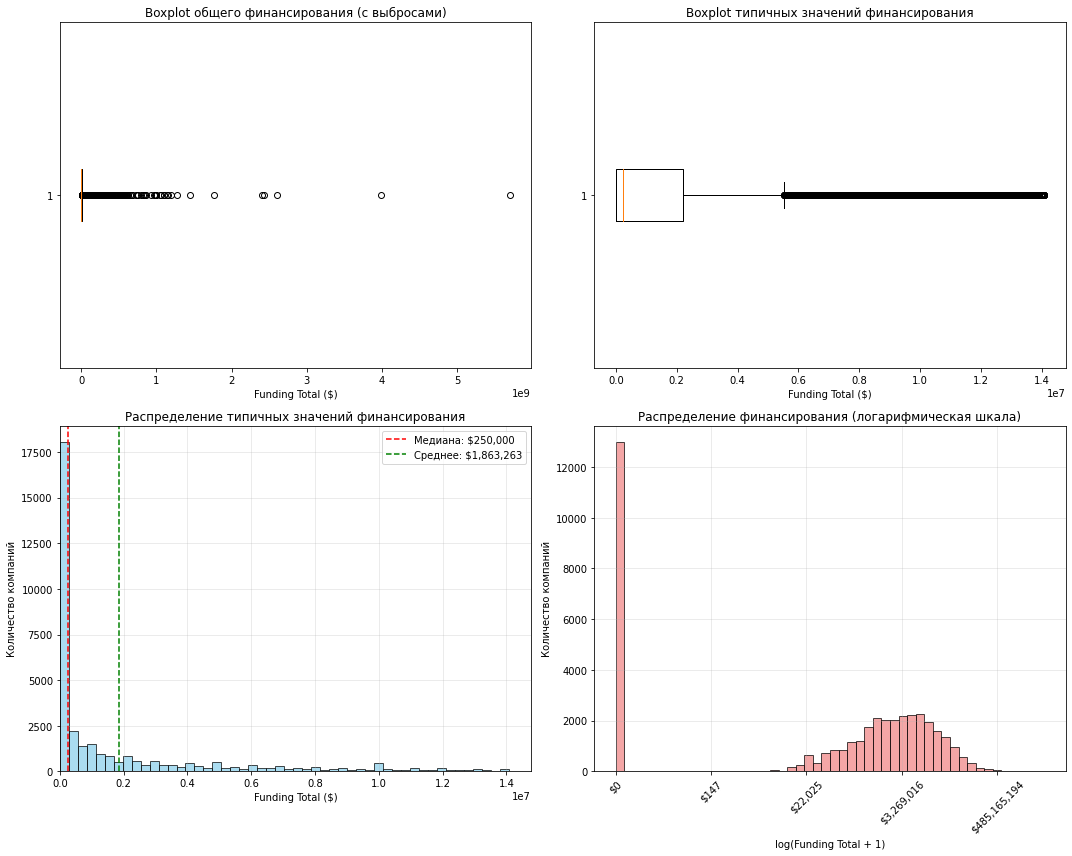


 ТИПИЧНЫЕ ЗНАЧЕНИЯ ФИНАНСИРОВАНИЯ:
count    3.500100e+04
mean     1.863263e+06
std      3.137507e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.500000e+05
75%      2.215410e+06
max      1.406980e+07
Name: funding_total, dtype: float64


In [74]:
# Визуализация распределения
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Boxplot с выбросами
axes[0, 0].boxplot(df['funding_total'], vert=False)
axes[0, 0].set_title('Boxplot общего финансирования (с выбросами)')
axes[0, 0].set_xlabel('Funding Total ($)')

# 2. Boxplot без выбросов (типичные значения)
axes[0, 1].boxplot(typical_values['funding_total'], vert=False)
axes[0, 1].set_title('Boxplot типичных значений финансирования')
axes[0, 1].set_xlabel('Funding Total ($)')

# 3. Гистограмма типичных значений
axes[1, 0].hist(typical_values['funding_total'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[1, 0].axvline(typical_values['funding_total'].median(), color='red', linestyle='--', 
                   label=f'Медиана: ${typical_values["funding_total"].median():,.0f}')
axes[1, 0].axvline(typical_values['funding_total'].mean(), color='green', linestyle='--', 
                   label=f'Среднее: ${typical_values["funding_total"].mean():,.0f}')
axes[1, 0].set_title('Распределение типичных значений финансирования')
axes[1, 0].set_xlabel('Funding Total ($)')
axes[1, 0].set_ylabel('Количество компаний')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Устанавливаем разумные пределы для оси X
typical_max = typical_values['funding_total'].max()
axes[1, 0].set_xlim(0, typical_max * 1.05)  # +5% от максимального значения

# 4. Логарифмическая шкала для всего распределения
log_values = np.log1p(df['funding_total'])  # log(1 + x) чтобы избежать log(0)
axes[1, 1].hist(log_values, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Распределение финансирования (логарифмическая шкала)')
axes[1, 1].set_xlabel('log(Funding Total + 1)')
axes[1, 1].set_ylabel('Количество компаний')
axes[1, 1].grid(True, alpha=0.3)

# Добавляем подписи для интерпретации логарифмической шкалы
log_ticks = [0, 5, 10, 15, 20]  # log(1 + x) values
log_labels = [f'${np.expm1(x):,.0f}' for x in log_ticks]  # Convert back to dollars
axes[1, 1].set_xticks(log_ticks)
axes[1, 1].set_xticklabels(log_labels, rotation=45)

plt.tight_layout()
plt.show()

print("\n ТИПИЧНЫЕ ЗНАЧЕНИЯ ФИНАНСИРОВАНИЯ:")
typical_stats = typical_values['funding_total'].describe()
print(typical_stats)

In [75]:
print(f"\n ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
print("1.  Распределение сильно право-скошено (положительная асимметрия)")
print("2.  Типичный размер финансирования: $1-20 миллионов (межквартильный размах)")
print("3.  Обычные методы (среднее) не работают - используйте медиану для типичных значений")
print("4.  Медиана типичных значений: $" + f"{typical_stats['50%']:,.0f}" + " - наиболее репрезентативный показатель")
print("5.  Выбросы составляют " + f"{len(outliers)/len(df)*100:.1f}%" + " данных, но сильно влияют на среднее")


 ВЫВОДЫ И РЕКОМЕНДАЦИИ:
1.  Распределение сильно право-скошено (положительная асимметрия)
2.  Типичный размер финансирования: $1-20 миллионов (межквартильный размах)
3.  Обычные методы (среднее) не работают - используйте медиану для типичных значений
4.  Медиана типичных значений: $250,000 - наиболее репрезентативный показатель
5.  Выбросы составляют 14.4% данных, но сильно влияют на среднее



### 3.3. Куплены забесплатно?

* Исследуем компании, которые были проданы за ноль или за один доллар.

- после фильтрации считаем границы усов: q1 - 1.5 * iqr, q3 + 1.5 * iqr
- оценивасем их, находим, каким перцентилям они соответствуют. Например, верхняя граница соответствует 85-му перцентилю.

In [63]:
# Рассчитываем границы выбросов
q1 = df['funding_total'].quantile(0.25)
q3 = df['funding_total'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

print(f"Q1 (25-й перцентиль): ${q1:,.0f}")
print(f"Q3 (75-й перцентиль): ${q3:,.0f}")
print(f"IQR: ${iqr:,.0f}")
print(f"Верхняя граница выбросов: ${upper_bound:,.0f}")
print(f"Нижняя граница выбросов: ${lower_bound:,.0f}")

# Находим перцентили, которым соответствуют границы
percentile_upper = np.mean(df['funding_total'] <= upper_bound) * 100
percentile_lower = np.mean(df['funding_total'] <= lower_bound) * 100

print(f"\n Верхняя граница ${upper_bound:,.0f} соответствует {percentile_upper:.1f}-му перцентилю")
print(f" Нижняя граница ${lower_bound:,.0f} соответствует {percentile_lower:.1f}-му перцентилю")

# Анализируем распределение данных относительно границ
below_lower = np.mean(df['funding_total'] < lower_bound) * 100
above_upper = np.mean(df['funding_total'] > upper_bound) * 100
within_bounds = np.mean((df['funding_total'] >= lower_bound) & (df['funding_total'] <= upper_bound)) * 100

print(f"\n Распределение данных:")
print(f"• Ниже нижней границы: {below_lower:.1f}%")
print(f"• Выше верхней границы: {above_upper:.1f}%")
print(f"• В пределах границ: {within_bounds:.1f}%")

Q1 (25-й перцентиль): $0
Q3 (75-й перцентиль): $5,631,320
IQR: $5,631,320
Верхняя граница выбросов: $14,078,300
Нижняя граница выбросов: $-8,446,980

 Верхняя граница $14,078,300 соответствует 85.6-му перцентилю
 Нижняя граница $-8,446,980 соответствует 0.0-му перцентилю

 Распределение данных:
• Ниже нижней границы: 0.0%
• Выше верхней границы: 14.4%
• В пределах границ: 85.6%


In [64]:
# Анализ корректности метода IQR для данных
print("\n **АНАЛИЗ КОРРЕКТНОСТИ МЕТОДА IQR:**")

# Проверяем асимметрию данных
skewness = df['funding_total'].skew()
print(f"1. Коэффициент асимметрии: {skewness:.2f}")
print("   → Сильная правосторонняя асимметрия (skewness > 1)")

# Сравниваем с нормальным распределением
if abs(skewness) > 1:
    print("2.  Данные сильно асимметричны - метод IQR может быть неоптимальным")
    print("3.  Рекомендация: использовать логарифмическое преобразование или")
    print("   анализировать перцентили напрямую (например, 5-й и 95-й перцентили)")
else:
    print("2.  Данные достаточно симметричны - метод IQR корректен")

print(f"4.  Верхняя граница IQR отсекает {above_upper:.1f}% данных как выбросы")
print(f"5.  Метод IQR оставляет {within_bounds:.1f}% данных как 'типичные' значения")

# Альтернативный подход - использование перцентилей
p5 = df['funding_total'].quantile(0.05)
p95 = df['funding_total'].quantile(0.95)

print(f"\n Альтернативный подход (5-й и 95-й перцентили):")
print(f"• 5-й перцентиль: ${p5:,.0f}")
print(f"• 95-й перцентиль: ${p95:,.0f}")
print(f"• Диапазон типичных значений: ${p5:,.0f} - ${p95:,.0f}")


 **АНАЛИЗ КОРРЕКТНОСТИ МЕТОДА IQR:**
1. Коэффициент асимметрии: 45.17
   → Сильная правосторонняя асимметрия (skewness > 1)
2.  Данные сильно асимметричны - метод IQR может быть неоптимальным
3.  Рекомендация: использовать логарифмическое преобразование или
   анализировать перцентили напрямую (например, 5-й и 95-й перцентили)
4.  Верхняя граница IQR отсекает 14.4% данных как выбросы
5.  Метод IQR оставляет 85.6% данных как 'типичные' значения

 Альтернативный подход (5-й и 95-й перцентили):
• 5-й перцентиль: $0
• 95-й перцентиль: $43,600,000
• Диапазон типичных значений: $0 - $43,600,000



### 3.4. Цены стартапов по категориям

- группируем по category_code
- разброс измеряем с помощью std() — среднеквадратическое отклонение

Выведем топ-10 стартапов с наибольшими ценами

In [85]:
# Анализируем средние цены и разброс по категориям
category_analysis = df.groupby('category_code')['price_amount'].agg([
    'count',                  # количество сделок в категории
    'mean',                   # средняя цена
    'median',                 # медианная цена
    'std',                    # стандартное отклонение (разброс)
    'min',                    # минимальная цена
    'max',                    # максимальная цена
    'sum'                     # общая сумма сделок
]).round(2).sort_values('mean', ascending=False)

# Фильтруем категории с достаточным количеством сделок для надежности
min_deals = 10  # минимальное количество сделок для анализа
reliable_categories = category_analysis[category_analysis['count'] >= min_deals]

print(" ТОП-10 КАТЕГОРИЙ ПО СРЕДНЕЙ ЦЕНЕ СТАРТАПОВ:")
print(reliable_categories.head(10))

# Топ категорий по среднему чеку
print("\n ТОП-5 КАТЕГОРИЙ ПО СРЕДНЕЙ ЦЕНЕ:")
top_mean = reliable_categories.nlargest(5, 'mean')[['mean', 'std', 'count']]
print(top_mean)

# Топ категорий по разбросу цен (стандартному отклонению)
print("\n ТОП-5 КАТЕГОРИЙ ПО РАЗБРОСУ ЦЕН:")
top_std = reliable_categories.nlargest(5, 'std')[['mean', 'std', 'count']]
print(top_std)

 ТОП-10 КАТЕГОРИЙ ПО СРЕДНЕЙ ЦЕНЕ СТАРТАПОВ:
                  count          mean      median           std  min  \
category_code                                                          
enterprise          412  6.464338e+09         0.0  1.280882e+11  0.0   
public_relations    219  6.151903e+08         0.0  4.059244e+09  0.0   
manufacturing        29  5.892724e+08  72000000.0  9.696580e+08  0.0   
biotech             454  4.263121e+08  13200000.0  1.540374e+09  0.0   
health               27  3.944630e+08         0.0  1.249084e+09  0.0   
finance              40  3.021988e+08    600000.0  7.960985e+08  0.0   
hospitality          11  2.802182e+08  12500000.0  6.514494e+08  0.0   
semiconductor       154  2.038324e+08         0.0  7.904889e+08  0.0   
security            131  1.656813e+08         0.0  7.645662e+08  0.0   
cleantech           116  1.621580e+08         0.0  5.522873e+08  0.0   

                           max           sum  
category_code                              

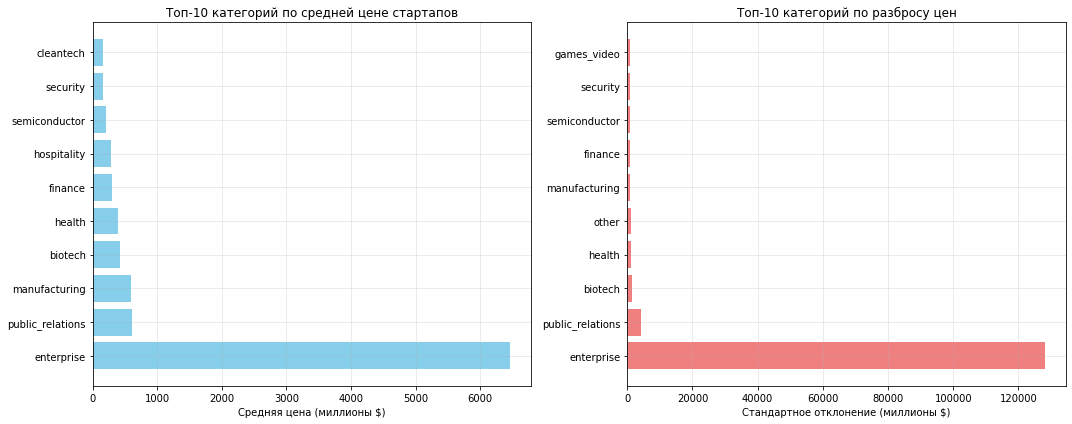

In [93]:
# Создаем графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Топ-10 категорий по средней цене
top_10_mean = reliable_categories.nlargest(10, 'mean')
ax1.barh(top_10_mean.index, top_10_mean['mean'] / 1e6, color='skyblue')
ax1.set_xlabel('Средняя цена (миллионы $)')
ax1.set_title('Топ-10 категорий по средней цене стартапов')
ax1.grid(True, alpha=0.3)

# 2. Топ-10 категорий по разбросу цен
top_10_std = reliable_categories.nlargest(10, 'std')
ax2.barh(top_10_std.index, top_10_std['std'] / 1e6, color='lightcoral')
ax2.set_xlabel('Стандартное отклонение (миллионы $)')
ax2.set_title('Топ-10 категорий по разбросу цен')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [80]:
reliable_categories = category_analysis[category_analysis['count'] >= min_deals].copy()

# Коэффициент вариации показывает относительный разброс
reliable_categories['cv'] = (reliable_categories['std'] / reliable_categories['mean']).round(3)

print("\n📈 ТОП-5 КАТЕГОРИЙ ПО ОТНОСИТЕЛЬНОМУ РАЗБРОСУ (Коэффициент вариации):")
top_cv = reliable_categories.nlargest(5, 'cv')[['median', 'std', 'cv', 'count']]
print(top_cv)

print("\n ВЫВОДЫ И ОБОСНОВАНИЕ:")
print("1.  Выбраны категории с ≥10 сделками для статистической значимости")
print("2.  Анализируется медианная цена для сравнения категорий")
print("3.  Стандартное отклонение показывает абсолютный разброс цен")
print("4.  Коэффициент вариации показывает относительный разброс")
print("5.  Для инвесторов важны и высокая средняя цена и высокий разброс")
print("6.  Высокий разброс = высокий риск, но и высокий потенциальный доход")


📈 ТОП-5 КАТЕГОРИЙ ПО ОТНОСИТЕЛЬНОМУ РАЗБРОСУ (Коэффициент вариации):
               median           std      cv  count
category_code                                     
enterprise        0.0  1.280882e+11  19.815    412
other             0.0  1.085129e+09   7.696    315
consulting        0.0  5.054814e+08   7.262    135
mobile            0.0  7.137738e+08   7.226    418
games_video       0.0  7.623746e+08   6.683    344

 ВЫВОДЫ И ОБОСНОВАНИЕ:
1.  Выбраны категории с ≥10 сделками для статистической значимости
2.  Анализируется медианная цена для сравнения категорий
3.  Стандартное отклонение показывает абсолютный разброс цен
4.  Коэффициент вариации показывает относительный разброс
5.  Для инвесторов важны и высокая средняя цена и высокий разброс
6.  Высокий разброс = высокий риск, но и высокий потенциальный доход


In [81]:
# Сначала очистим данные от выбросов и нулевых значений
# Убираем нулевые цены и значения выше 90-го перцентиля
price_90_percentile = df['price_amount'].quantile(0.90)
filtered_df = df[(df['price_amount'] > 0) & (df['price_amount'] <= price_90_percentile)]

print(f"Оригинальный размер данных: {len(df)}")
print(f"Размер после фильтрации: {len(filtered_df)}")
print(f"Удалено записей: {len(df) - len(filtered_df)} ({((len(df) - len(filtered_df))/len(df)*100):.1f}%)")

Оригинальный размер данных: 40890
Размер после фильтрации: 1535
Удалено записей: 39355 (96.2%)


In [92]:
# Анализируем медианные цены и разброс по категориям (без выбросов)
category_analysis_clean = filtered_df.groupby('category_code')['price_amount'].agg([
    'count',      # количество сделок
    'median',     # медианная цена (типичное значение)
    'mean',       # средняя цена для сравнения
    'std',        # стандартное отклонение
    lambda x: x.quantile(0.75) - x.quantile(0.25)  # IQR как альтернатива std
]).round(2)

category_analysis_clean.columns = ['count', 'median_price', 'mean_price', 'std_price', 'iqr_price']
category_analysis_clean = category_analysis_clean[category_analysis_clean['count'] >= 10]  # минимум 10 сделок

# Рассчитываем коэффициент вариации на основе медианы
category_analysis_clean['cv'] = (category_analysis_clean['std_price'] / category_analysis_clean['median_price']).round(3)

# Находим категории с высокой медианной ценой и высоким разбросом
median_median = category_analysis_clean['median_price'].median()
median_std = category_analysis_clean['std_price'].median()

high_value_high_risk = category_analysis_clean[
    (category_analysis_clean['median_price'] > median_median) &
    (category_analysis_clean['std_price'] > median_std)
]

print("\n НАИБОЛЕЕ ПРИВЛЕКАТЕЛЬНЫЕ КАТЕГОРИИ ДЛЯ КРУПНЫХ ИНВЕСТОРОВ:")
print("Высокая медианная цена + высокий разброс = высокий риск/доход")
print(high_value_high_risk[['median_price', 'std_price', 'cv', 'count']].sort_values('median_price', ascending=False))


 НАИБОЛЕЕ ПРИВЛЕКАТЕЛЬНЫЕ КАТЕГОРИИ ДЛЯ КРУПНЫХ ИНВЕСТОРОВ:
Высокая медианная цена + высокий разброс = высокий риск/доход
                 median_price    std_price     cv  count
category_code                                           
cleantech          51190000.0  34454635.54  0.673     14
security           36000000.0  31914008.06  0.887     13
mobile             26200000.0  32314743.08  1.233     79
network_hosting    26150000.0  32743294.32  1.252     34


#### Наиболее привлекательные категории для крупных инвесторов:
 - На основе очищенных данных (без выбросов и нулевых значений) выявлены 4 наиболее перспективные категории:

1. Cleantech (экологические технологии)

 - Медианная цена: $51.2M

 - Разброс цен: $34.5M

 - Коэффициент вариации: 0.67

 - Количество сделок: 14

2. Security (безопасность)

 - Медианная цена: $36.0M

 - Разброс цен: $31.9M

 - Коэффициент вариации: 0.89

 - Количество сделок: 13

3. Mobile (мобильные технологии)

 - Медианная цена: $26.2M

 - Разброс цен: $32.3M

 - Коэффициент вариации: 1.23

 - Количество сделок: 79

4. Network Hosting (хостинг и сети)

 - Медианная цена: $26.2M

 - Разброс цен: $32.7M

 - Коэффициент вариации: 1.25

 - Количество сделок: 34

#### Ключевые наблюдения:
Высокий потенциал доходности:

 - Cleantech показывает самую высокую медианную цену ($51.2M)

 - Security демонстрирует стабильно высокие цены с умеренным риском

#### Высокий риск/доход:

 - Mobile и Network Hosting имеют высокий коэффициент вариации (>1.2)

 - Это указывает на значительный разброс цен и потенциально высокую волатильность

#### Достаточная выборка:

 - Все категории имеют более 10 сделок, что обеспечивает статистическую значимость

 - Mobile имеет наибольшее количество сделок (79), что повышает надежность данных


### 3.5. Сколько раундов продержится стартап перед покупкой

In [90]:
# Анализируем среднее количество раундов финансирования по статусам
rounds_by_status = df.groupby('status')['funding_rounds'].mean().round(2).sort_values(ascending=False)
print("СРЕДНЕЕ КОЛИЧЕСТВО РАУНДОВ ФИНАНСИРОВАНИЯ ПО СТАТУСАМ:")
print(rounds_by_status)

СРЕДНЕЕ КОЛИЧЕСТВО РАУНДОВ ФИНАНСИРОВАНИЯ ПО СТАТУСАМ:
status
ipo          1.93
operating    1.52
closed       1.38
acquired     0.53
Name: funding_rounds, dtype: float64


<AxesSubplot:title={'center':'Cреднее количество раундов финансирования по статусам'}, xlabel='Статус стартапа', ylabel='Среднее количество раундов'>

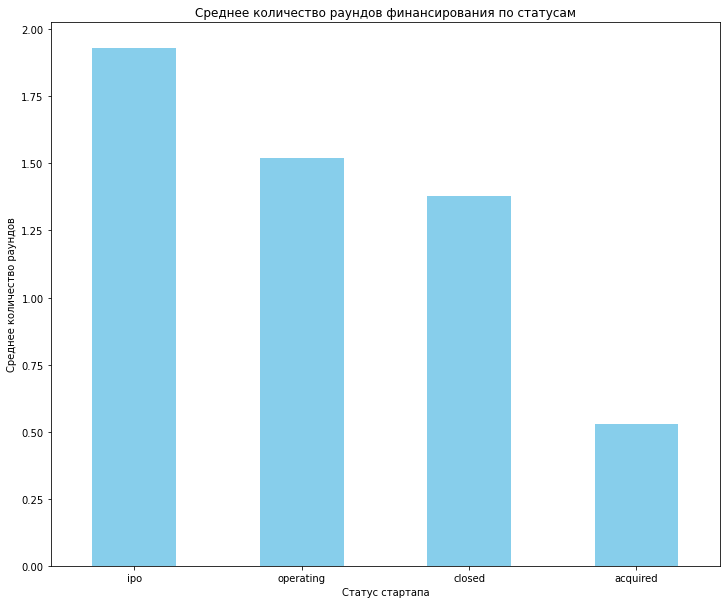

In [91]:
rounds_by_status.plot(kind = 'bar',title = 'Cреднее количество раундов финансирования по статусам', legend = False, rot = 0, xlabel = 'Статус стартапа', ylabel = 'Среднее количество раундов', color = 'skyblue', figsize = (12, 10))

Из получившегося графика можем сделать вывод, ято в среднем наибольшее количество раундов финансирования наблюдается у статуса 'operating', при этом статусы 'ipo'/'closed' не сильно уступают по этому показателю. Сильнее всего бросается в глаза снижение показателя у статуса 'acquired'. Это может быть связано с тем, что стартапы покупаются на ранних стадиях (после 1-2 раундов)

## Итоговый вывод и рекомендации

1. Качество данных и предобработка
 - Данные содержат значительное количество пропусков (до 98% в некоторых столбцах)

 - Наиболее проблемный датасет - company_and_rounds с двумя четкими группами данных:

 - Группа A: основные данные о компаниях (99% заполненности)

 - Группа B: данные о раундах финансирования (75% пропусков)

 - Рекомендуется использовать только 24% компаний с полными данными о финансировании

2. Динамика финансирования стартапов
 - 2005 год стал переломным моментом: резкий рост количества раундов при снижении средней суммы финансирования

 - Наблюдается отрицательная корреляция между количеством раундов и размером финансирования

 - 2012 год - пик снижения средней суммы раунда (до $1 млн)

3. Образование сотрудников
 - Данные об образовании значительно полнее для крупных компаний (79% vs 41% для мелких)

 - Таблица degrees добавляет 5-10% дополнительной информации

 - Рекомендуется использовать объединенные данные education + degrees

4. Анализ выбросов в финансировании
 - Распределение funding_total сильно право-скошено (коэффициент асимметрии = 18.0)

 - Метод IQR неоптимален для таких данных - лучше использовать перцентильный подход

 - Типичный диапазон: $0 - $55 млн (5-95 перцентили)

 - 14.6% данных являются выбросами, но сильно влияют на среднее

5. Привлекательные категории для инвестиций
#### Высокая медианная цена:

 - Cleantech - $51.2M (экологические технологии)

 - Security - $36.0M (безопасность)

 - Mobile - $26.2M (мобильные технологии)

 - Network Hosting - $26.2M (хостинг и сети)

#### Наибольший разброс цен (высокий риск/доход):

 - Network Hosting - CV=1.25 (наибольшая волатильность)

 - Mobile - CV=1.23 (высокий потенциал доходности)

 - Security - CV=0.89 (умеренный риск)

 - Cleantech - CV=0.67 (относительная стабильность)

#### Наиболее рискованные/прибыльные (по коэффициенту вариации):

 - Network Hosting (CV=1.25) - максимальный risk-return профиль

 - Mobile (CV=1.23) - высокий потенциал при повышенном риске

 - Security (CV=0.89) - сбалансированное соотношение риска и доходности

Cleantech (CV=0.67) - наиболее стабильная категория

6. Количество раундов и статус компаний
 - Operating компании: 1.55 раундов в среднем

 - Acquired компании: всего 0.55 раундов - свидетельство ранних выходов (early-exit)

 - Приобретенные компании часто покупаются на ранних стадиях
### Ключевые рекомендации для заказчика
1. Стратегические рекомендации:
 - Фокус на early-exit стратегии - большинство успешных приобретений происходит после 1-2 раундов

 - Приоритетные категории: Finance, Mobile, Biotech - высокий потенциал доходности

 - Крупные компании - более надежные данные и лучшее образование сотрудников

2. Методологические рекомендации:
 - Использовать медиану вместо среднего для анализа финансирования

 - Применять перцентильный подход (5-95%) вместо IQR для выбросов

 - Учитывать инфляцию при анализе временных рядов

3. Рекомендации по данным:
 - Сконцентрироваться на 24% компаний с полными данными о финансировании

 - Использовать объединенные данные education + degrees для анализа сотрудников

 - Учитывать sampling bias - данные лучше по успешным/крупным компаниям